## Adding the directory of the package to the system path

In [1]:
from config import *
append_path('../../')

## Import statements

In [2]:
import numpy as np
import pandas as pd
from m_learn.clustering import KMeans
from m_learn.utility.data_preprocessing import mesh_data
import matplotlib
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Creating data consisting of 3 clusters

### Creating the x,y,z of the 3 classes

In [3]:
# sigma of the random distribution
sigma = 4
# size of each class
cls_size = 1000
# creating x, y values of first class
x,y,z = 5,5,0
x1 = np.random.normal(x, sigma, cls_size)
y1 = np.random.normal(y, sigma, cls_size)
z1 = np.random.normal(z, sigma, cls_size)
# creating x, y values of second class
x,y,z = 15,15,0
x2 = np.random.normal(x, sigma, cls_size)
y2 = np.random.normal(y, sigma, cls_size)
z2 = np.random.normal(z, sigma, cls_size)
# creating x, y values of third class
x,y,z = 7,15,10
x3 = np.random.normal(x, sigma, cls_size)
y3 = np.random.normal(y, sigma, cls_size)
z3 = np.random.normal(z, sigma, cls_size)

creating the output values

In [4]:
output = [0 for i in range(cls_size)] + [1 for i in range(cls_size)] + [2 for i in range(cls_size)]

### Appending the x,y,z values of the 3 classes

In [5]:
# appending the x, y values of the different classes
x = np.append(x1,[x2,x3])
y = np.append(y1,[y2,y3])
z = np.append(z1,[z2,z3])

### Storing the inputs and output in pandas dataframe

In [6]:
# creating a pandas dataframe that contains the input and output
data = pd.DataFrame({"x": x, "y": y, "z":z,"output":output})

In [7]:
data.head(10)

output          x          y         z
0       0   7.453316   7.420993  4.314858
1       0  -0.728526   4.731178  4.653230
2       0   5.579260   7.174852  3.820931
3       0   7.140169   8.811891 -2.236049
4       0   4.806388  11.039687 -0.457066
5       0  -0.091526   4.978807 -1.108858
6       0  10.149890  10.355096  3.689123
7       0   8.807304   5.001254  9.381485
8       0  -1.088472   6.991952 -5.871597
9       0   7.538035   9.200379  1.065095

# Visualize the data

Extract the data of the 3 classes

In [8]:
class1 = data[data["output"] == 0]
class2 = data[data["output"] == 1]
class3 = data[data["output"] == 2]

Scatter plot of the 3 classes

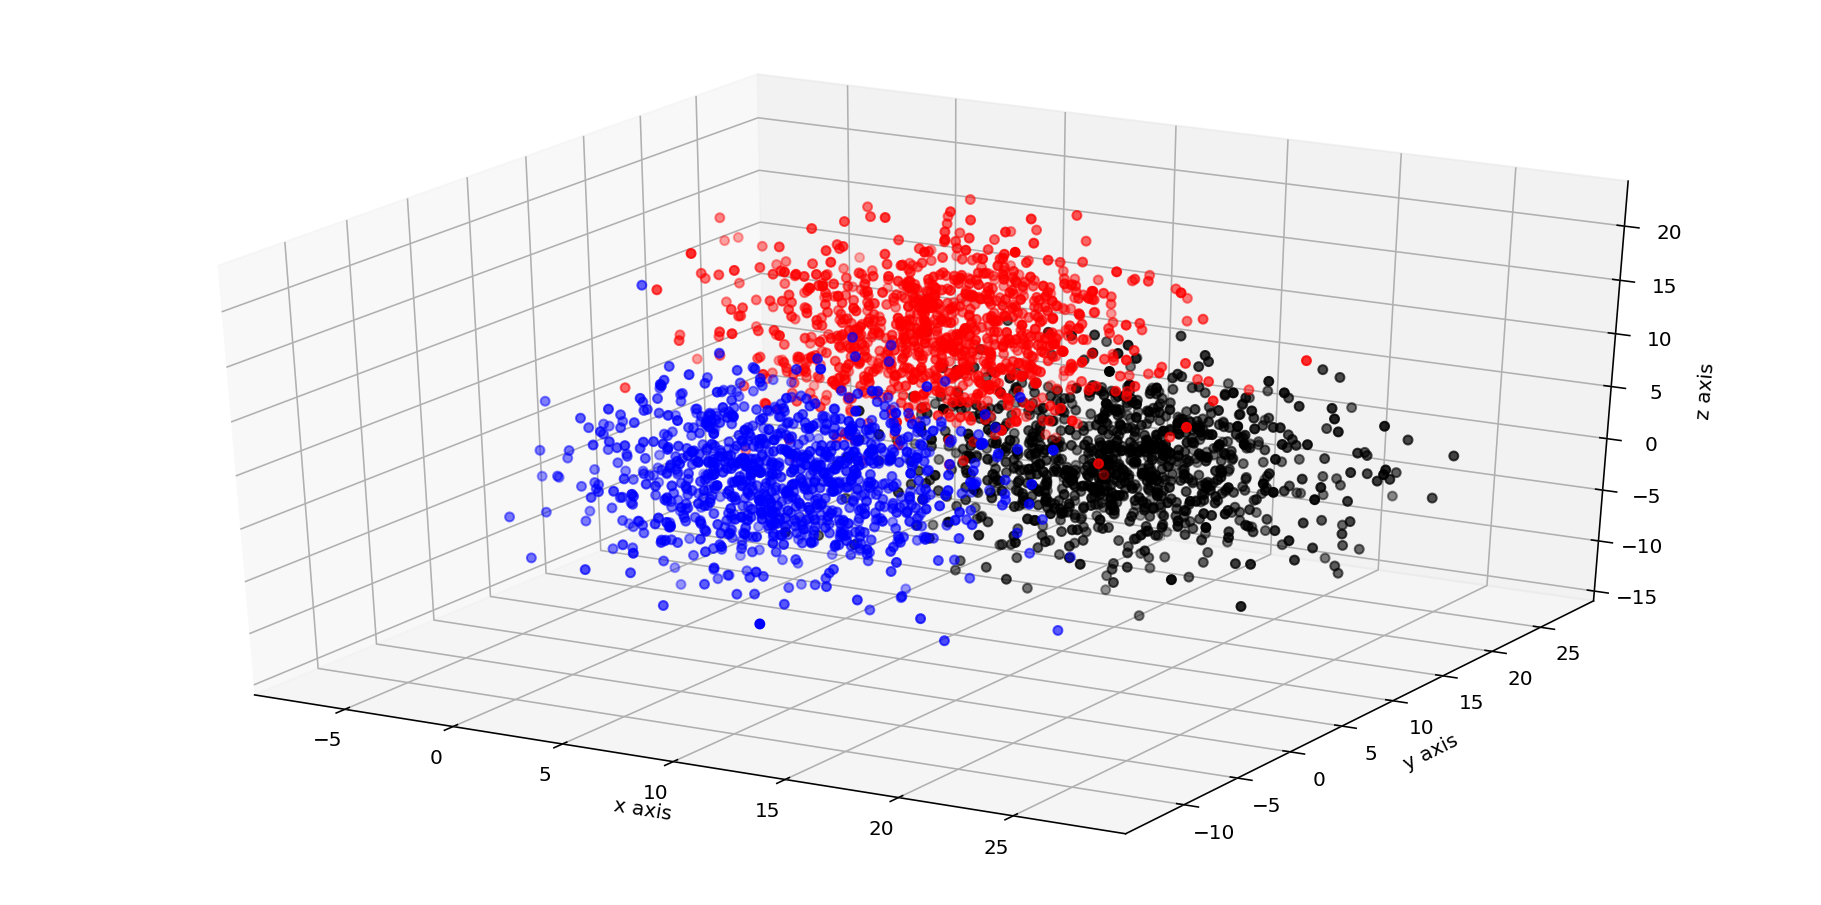

In [9]:
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(class1["x"], class1["y"], class1["z"], c ='b', marker='o', label = 'class1')
ax.scatter(class2["x"], class2["y"], class2["z"], c ='k', marker='o', label = 'class2')
ax.scatter(class3["x"], class3["y"], class3["z"], c ='r', marker='o', label = 'class3')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.show()

# Cluster the data using kmeans

In [10]:
# features of the model
features = ['x', 'y', 'z']
# max iteration of the model
max_iter = 5

### Create and fit the clustering model

In [11]:
model = KMeans(k = 3, track_inertia = True)
model.fit(data, features, max_iter)

Retrieve the cluster assignments of the model

In [12]:
cluster_assignments = model.cluster_assignments

Extract the cluster data 

In [13]:
# extracting the data of the 3 classes
cluster1 = data[cluster_assignments == 0]
cluster2 = data[cluster_assignments == 1]
cluster3 = data[cluster_assignments == 2]

### Scatter plot of the clustered data

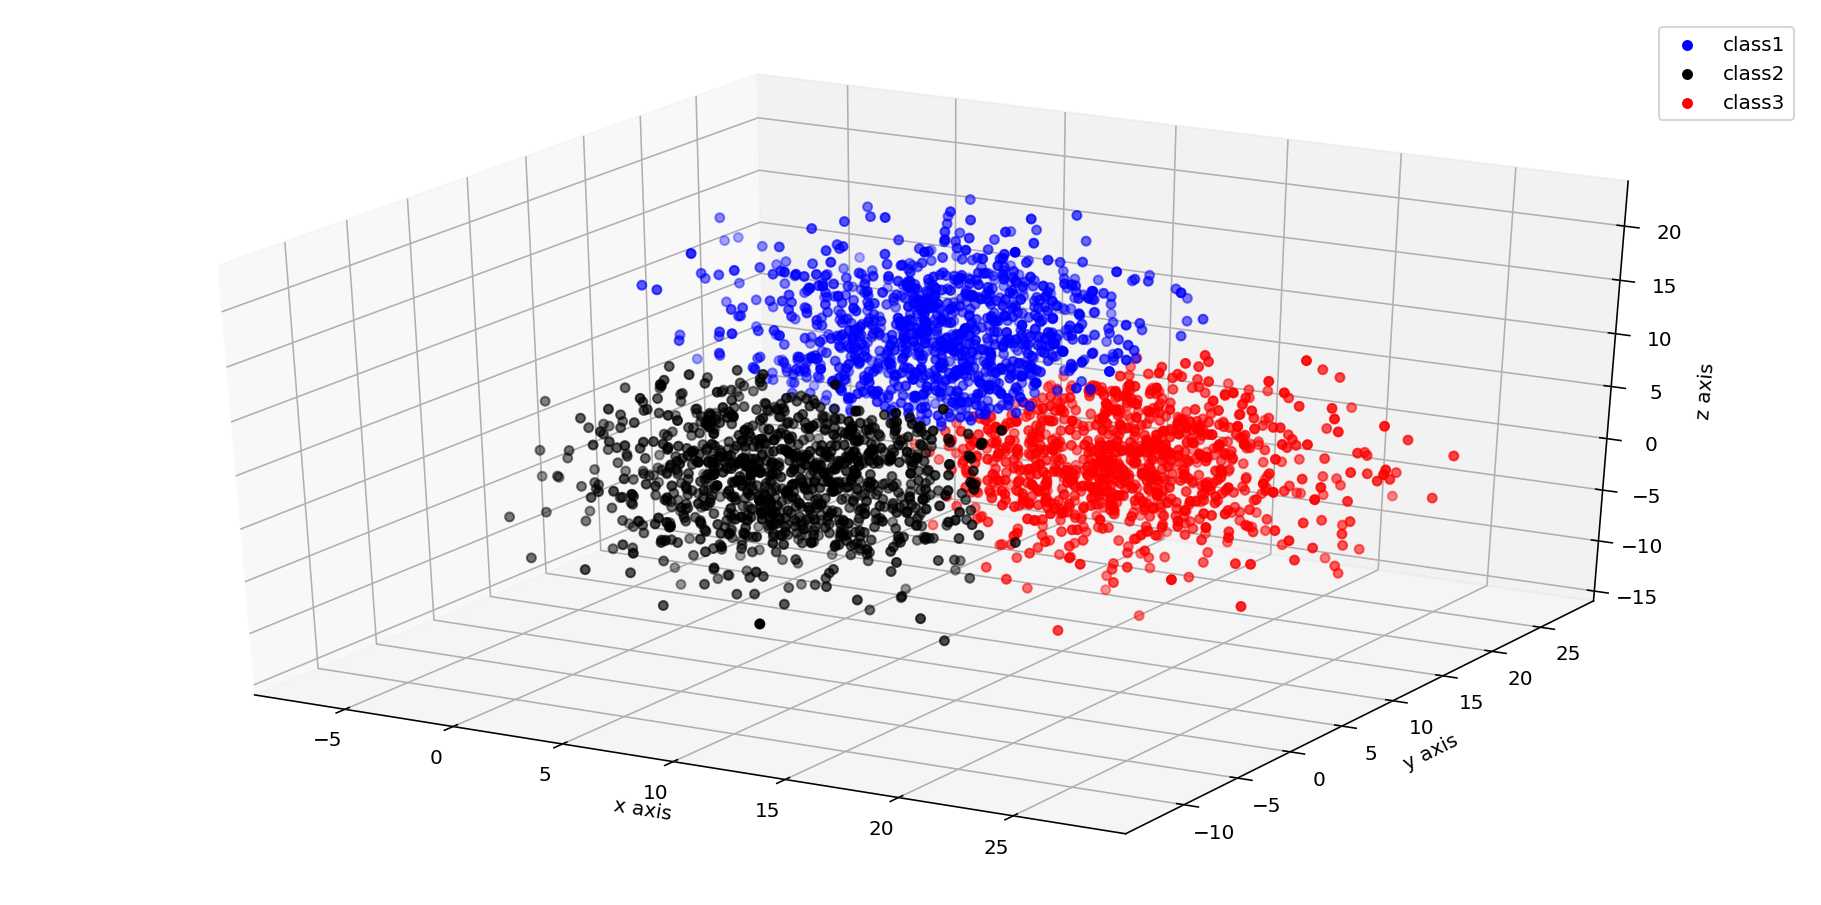

In [14]:
# scatter plot of the 3 clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster1["x"], cluster1["y"], cluster1["z"], c ='b', marker='o', label = 'class1')
ax.scatter(cluster2["x"], cluster2["y"], cluster2["z"], c ='k', marker='o', label = 'class2')
ax.scatter(cluster3["x"], cluster3["y"], cluster3["z"], c ='r', marker='o', label = 'class3')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.legend()
plt.show()

### Plot of heteroginity vs iterations 

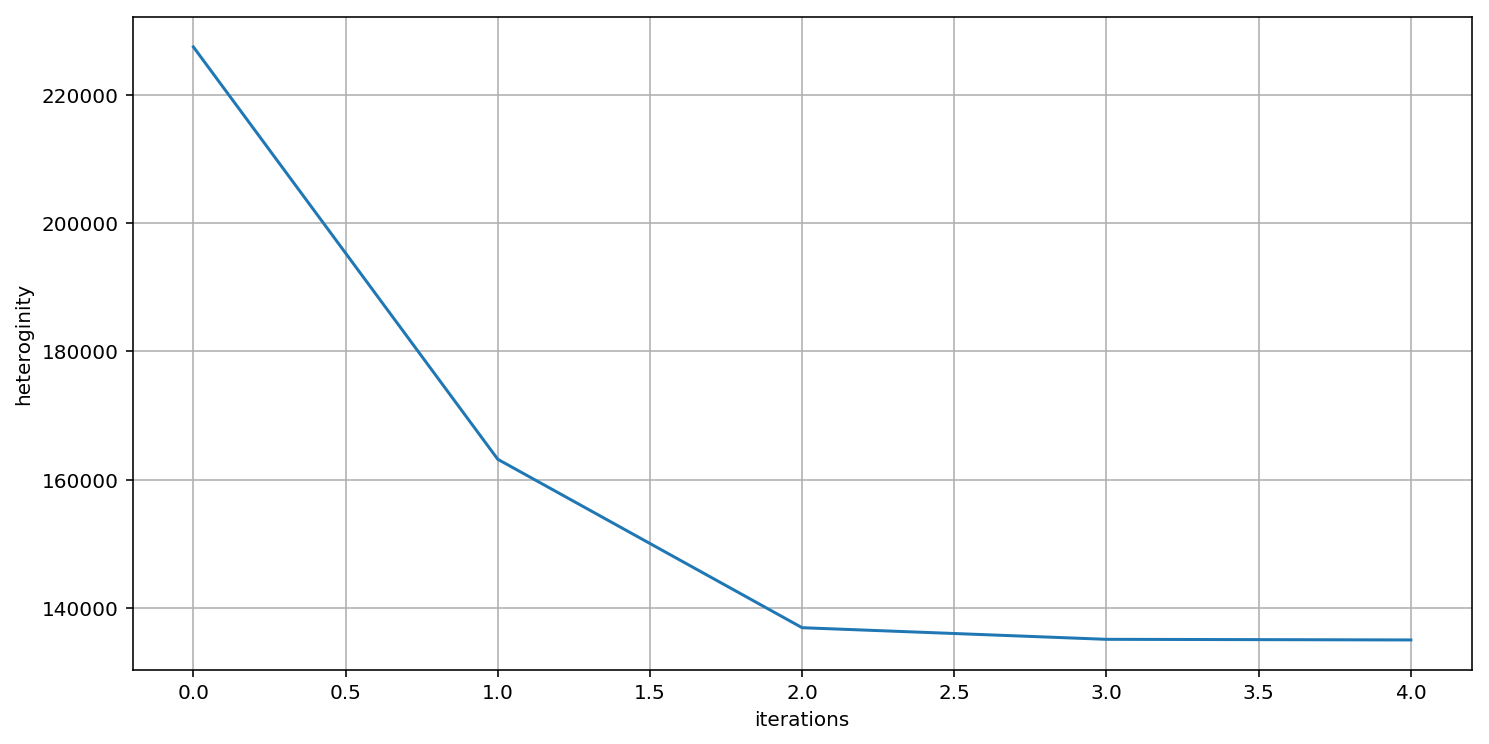

In [15]:
# set the size of matplotlib plot
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
# retrieving the record of inertia at each iteration
inertia_record = model.inertia_record
plt.plot(inertia_record)
plt.xlabel("iterations")
plt.ylabel("heteroginity")
plt.grid()
plt.show()